# FEM 1D

## Problem
$u''(x) + \bar{f}(x) = 0$ @ $0 < x < 1$,  subject to $u(0)=0$ and $u(1)=0$.

## 1D FEM - Julia implementation

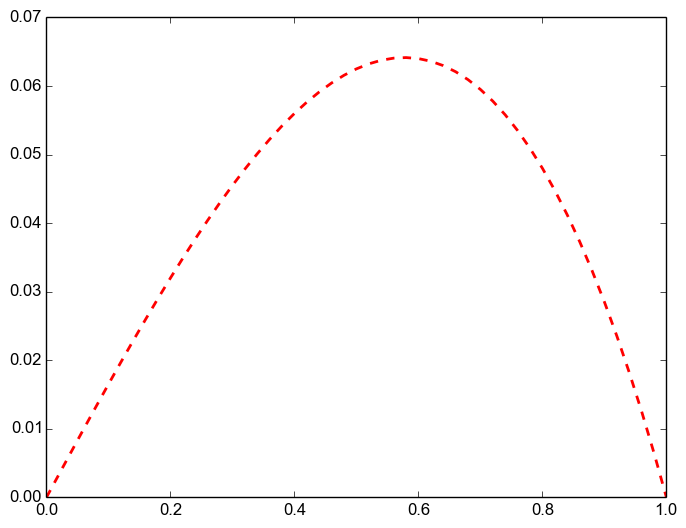

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5a452815d0>

In [2]:
# berkin@stanford.edu
# 

# 2 point quadrature rule
function Quadrature() #Assume two point quadrature
    return 2, [1,1], [-1/3,1/3]
end

# linear shape functions
function shape1D(ξ::Float64)
    return [0.5*(1-ξ),0.5*(1+ξ)] , [-0.5,0.5]
end

# number of elements
nele = 50;
nnode = nele+1; # node number
ndof=nnode;     # dof number
# domain
X = collect(linspace(0,1,nnode));

# get the connectivity 
connectivity = zeros(Int64,2,nele)
connectivity[1,:] = vec(collect(1:nnode-1))
connectivity[2,:] = vec(collect(2:nnode))

# initilize
K = zeros(Float64,ndof,ndof); # make this sparse
f = zeros(Float64,ndof);
u = zeros(Float64,ndof);

# get gauss integration information 
ngauss, W, Qp = Quadrature()
    
# loop over elements
for elem = 1 : nele
    
    # get the element information
    elConn = connectivity[:,elem]
    xCoor = X[elConn]
    
    # loop over gauss points
    for gp = 1 : ngauss
        
        # shape function
        N, dNdξ = shape1D(Qp[gp]);

        # compute jacobian 
        J = dNdξ'*xCoor;
        dNdx = dNdξ/J;
        
        # Stiffness matrix
        K[elConn,elConn] = K[elConn,elConn] + (dNdx*dNdx').*J.*W[gp];
        
        #compute f\bar function
        f̄ = N'*xCoor
        f[elConn] = f[elConn] + f̄.*N.*J*W[gp];
        
    end    
end

# BOUNDARY CONDITIONS
fixedDofs = [1,ndof];
uFixed = [0,0];

# force vector - boundary conditions
f = f - K[:,fixedDofs]*uFixed;

# find the free dofs
freeDofs = deleteat!(collect(1:ndof), fixedDofs);

# solve system
soln = K[freeDofs,freeDofs]\f[freeDofs]

# update solution u
u[freeDofs] = soln;
u[fixedDofs] = uFixed;

# Plot the solution
using PyPlot
plot(X, u, color="red", linewidth=2.0, linestyle="--")
